In [4]:
!pip install Keras-Preprocessing

In [5]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Embedding,MaxPool1D
#from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv("politik_cleaned.csv")
df.head()

,full_text,label,text_clean
0,Atalia Dituding Perpanjang Dinasti Politik kar...,0,atalia dituding perpanjang dinasti politik kar...
1,Tahun Baru. Saya harap ahli politik tanahair d...,1,tahun baru saya harap ahli politik tanahair da...
2,Saya cukup ghibah politik. Sudah diurus banyak...,1,saya cukup ghibah politik sudah diurus banyak ...
3,Buka X skrg udah kaya masuk kelas FISIP ajg is...,1,buka x skrg udah kaya masuk kelas fisip ajg is...
4,Saya menjual NASIHAT UNTUK SBY ~ politik ~ huk...,1,saya menjual nasihat untuk sby politik hukum p...


In [7]:
df = df[["text_clean", "label"]]
df.rename(columns={"text_clean": "text", "label": "label"}, inplace=True)
# df.rename(columns={"Tweets": "text", "Label": "label"}, inplace=True)
# df["label"] = df["label"].map({"Hoax": 1, "Valid": 0})
df['label'] = df['label'].astype('int')
df.replace("", float("NaN"), inplace=True)
df.dropna(inplace=True)

df = df[['text', 'label']]

df.sample(5)

<ipython-input-7-012d123139f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"text_clean": "text", "label": "label"}, inplace=True)
<ipython-input-7-012d123139f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].astype('int')
<ipython-input-7-012d123139f9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace("", float("NaN"),

,text,label
230,aku politik bisa stop lewat tl gak jing,1
2879,lhkp dorong kader muhammadiyah berdiaspora dal...,0
2674,gue belakangan lg compare karir politik anies ...,1
1444,ewh najis tl gue politik semua,1
3256,programnya presiden rumah rakyat gagal begini ...,1


In [8]:
df.shape

(4263, 2)

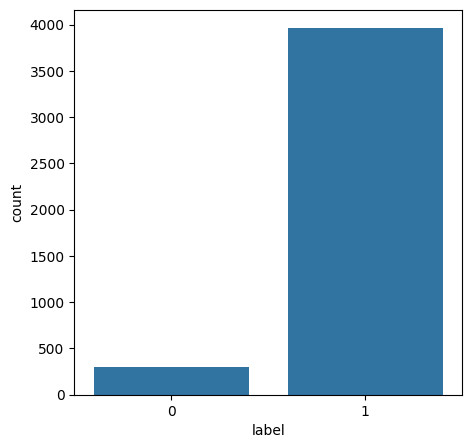

In [9]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x=df['label'])


# W2V


In [10]:
from gensim.models import Word2Vec

In [11]:
tokenized_tweet = df['text'].apply(lambda x: x.split())
tokenized_tweet

,text
0,"[atalia, dituding, perpanjang, dinasti, politi..."
1,"[tahun, baru, saya, harap, ahli, politik, tana..."
2,"[saya, cukup, ghibah, politik, sudah, diurus, ..."
3,"[buka, x, skrg, udah, kaya, masuk, kelas, fisi..."
4,"[saya, menjual, nasihat, untuk, sby, politik, ..."
...,...
4258,"[menteri, itu, jabatan, politik, meskipun, beg..."
4259,"[jeje, govinda, tak, kapok, terjun, ke, politi..."
4260,"[jauhi, jangan, layan, kelompok, anutan, narsi..."
4261,"[sebenarnya, kejadian, saat, ini, tuh, momentu..."


In [12]:
#setting parameter word2vec
model = Word2Vec(sentences=tokenized_tweet, vector_size=100, window=6, min_count=1, workers=4)
model.save("word2vec.model")

In [13]:
model = Word2Vec.load("word2vec.model")
model.train(tokenized_tweet, total_examples=len(tokenized_tweet), epochs=10)

(936709, 1071370)

In [14]:
from gensim.models import KeyedVectors

word_vectors = model.wv
word_vectors.save("word2vec.wordvectors")

wv = KeyedVectors.load("word2vec.wordvectors", mmap='r')
vector = wv['gagal']

vector

array([-1.2072197e-01,  3.0798572e-01,  1.6984716e-01,  7.9162046e-03,
       -2.4735607e-04, -6.1894190e-01,  1.9512649e-01,  7.8691214e-01,
       -3.5064128e-01, -5.2445811e-01, -1.0569296e-01, -5.7412255e-01,
       -5.9344765e-02,  2.9417640e-01,  1.3084427e-01, -1.7485939e-01,
        3.3633170e-01, -3.0241168e-01, -1.6753779e-01, -7.5476640e-01,
        2.8322878e-01,  2.2875598e-01,  3.7844005e-01, -3.5825011e-01,
       -2.4151816e-03,  1.9971623e-01, -3.9584294e-01, -3.5685167e-01,
       -4.0097985e-01,  2.1002874e-01,  4.4445905e-01, -1.8959604e-01,
        1.2089409e-01, -4.4222596e-01, -1.5112713e-01,  4.3588686e-01,
       -1.7341416e-02, -3.1779769e-01, -1.7401293e-01, -7.9449034e-01,
        2.1216947e-01, -3.1907836e-01, -3.8842225e-01,  4.8235144e-02,
        2.5618458e-01, -2.7550748e-01, -3.5901988e-01, -8.0271624e-02,
        3.0944848e-01,  2.9974815e-01,  7.8863747e-02, -4.8711905e-01,
       -1.5477270e-01,  4.1887775e-02, -2.1258582e-01,  3.1021446e-01,
      

In [15]:
X = df['text']
y = df['label']

In [16]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

X = tokenizer.texts_to_sequences(X)

In [17]:
word_index = tokenizer.word_index
for word, num in word_index.items():
    print(f"{word} -> {num}")
    if num == 10:
        break

politik -> 1
gue -> 2
dan -> 3
di -> 4
yg -> 5
yang -> 6
ini -> 7
itu -> 8
ada -> 9
indonesia -> 10


In [18]:
maxlen = 700

X = pad_sequences(X, maxlen=maxlen)

In [19]:
vocab_size = len(tokenizer.word_index) + 1

In [20]:
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, 100))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

In [21]:
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, 100))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        if word in model:  # Check if the word is in the model
            weight_matrix[i] = model[word]
    return weight_matrix

In [22]:
embedding_vectors = get_weight_matrix(wv, word_index)

In [23]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [24]:
#LSTM
kf = KFold(n_splits=10)

reports = []
confusions = []

for train_index, test_index in kf.split(X):

  X_train = X[train_index]
  y_train = y[train_index]

  X_test = X[test_index]
  y_test = y[test_index]

  model = Sequential()
  model.add(Embedding(vocab_size, output_dim=100, weights=[embedding_vectors], input_length=maxlen, trainable=False))
  #LSTM
  model.add(LSTM(units=128))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

  model.summary()
  model.fit(X_train, y_train, validation_split=0.3, epochs=6)

  y_pred = (model.predict(X_test) >= 0.5).astype("int")

  accuracy_score(y_test, y_pred)

  reports.append(classification_report(y_test, y_pred))
  confusions.append(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │       1,580,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,580,600 (6.03 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,580,600 (6.03 MB)

Epoch 1/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - acc: 0.9229 - loss: 0.2373 - val_acc: 0.8836 - val_loss: 0.2808
Epoch 2/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - acc: 0.9480 - loss: 0.1699 - val_acc: 0.8836 - val_loss: 0.3289
Epoch 3/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.9418 - loss: 0.1639 - val_acc: 0.8836 - val_loss: 0.3062
Epoch 4/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.9400 - loss: 0.1760 - val_acc: 0.8836 - val_loss: 0.3735
Epoch 5/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - acc: 0.9475 - loss: 0.1602 - val_acc: 0.8836 - val_loss: 0.2654
Epoch 6/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - acc: 0.9459 - loss: 0.1544 - val_acc: 0.8827 - val_loss: 0.2860
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │       1,580,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,580,600 (6.03 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,580,600 (6.03 MB)

Epoch 1/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - acc: 0.9289 - loss: 0.2629 - val_acc: 0.8836 - val_loss: 0.3008
Epoch 2/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.9430 - loss: 0.1796 - val_acc: 0.8836 - val_loss: 0.3056
Epoch 3/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - acc: 0.9406 - loss: 0.1788 - val_acc: 0.8827 - val_loss: 0.2727
Epoch 4/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - acc: 0.9513 - loss: 0.1634 - val_acc: 0.8836 - val_loss: 0.3060
Epoch 5/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - acc: 0.9432 - loss: 0.1812 - val_acc: 0.8853 - val_loss: 0.2801
Epoch 6/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - acc: 0.9397 - loss: 0.1722 - val_acc: 0.8844 - val_loss: 0.2765
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │       1,580,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,580,600 (6.03 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,580,600 (6.03 MB)

Epoch 1/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - acc: 0.8992 - loss: 0.2563 - val_acc: 0.8836 - val_loss: 0.3181
Epoch 2/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - acc: 0.9454 - loss: 0.1660 - val_acc: 0.8844 - val_loss: 0.2890
Epoch 3/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.9434 - loss: 0.1784 - val_acc: 0.8836 - val_loss: 0.2996
Epoch 4/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - acc: 0.9454 - loss: 0.1650 - val_acc: 0.8862 - val_loss: 0.3313
Epoch 5/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - acc: 0.9540 - loss: 0.1508 - val_acc: 0.8853 - val_loss: 0.2647
Epoch 6/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - acc: 0.9477 - loss: 0.1627 - val_acc: 0.8836 - val_loss: 0.2693
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │       1,580,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,580,600 (6.03 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,580,600 (6.03 MB)

Epoch 1/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - acc: 0.9372 - loss: 0.2282 - val_acc: 0.8845 - val_loss: 0.2880
Epoch 2/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - acc: 0.9457 - loss: 0.1806 - val_acc: 0.8845 - val_loss: 0.2846
Epoch 3/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - acc: 0.9512 - loss: 0.1594 - val_acc: 0.8837 - val_loss: 0.2773
Epoch 4/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - acc: 0.9410 - loss: 0.1772 - val_acc: 0.8845 - val_loss: 0.3286
Epoch 5/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - acc: 0.9477 - loss: 0.1582 - val_acc: 0.8837 - val_loss: 0.2980
Epoch 6/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - acc: 0.9560 - loss: 0.1350 - val_acc: 0.8837 - val_loss: 0.3086
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │       1,580,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,580,600 (6.03 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,580,600 (6.03 MB)

Epoch 1/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - acc: 0.9372 - loss: 0.2405 - val_acc: 0.8837 - val_loss: 0.2977
Epoch 2/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.9515 - loss: 0.1491 - val_acc: 0.8837 - val_loss: 0.3501
Epoch 3/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - acc: 0.9586 - loss: 0.1398 - val_acc: 0.8845 - val_loss: 0.2875
Epoch 4/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - acc: 0.9536 - loss: 0.1329 - val_acc: 0.8828 - val_loss: 0.2789
Epoch 5/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - acc: 0.9637 - loss: 0.1236 - val_acc: 0.8845 - val_loss: 0.2657
Epoch 6/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - acc: 0.9594 - loss: 0.1255 - val_acc: 0.8863 - val_loss: 0.2877
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │       1,580,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,580,600 (6.03 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,580,600 (6.03 MB)

Epoch 1/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - acc: 0.9186 - loss: 0.2198 - val_acc: 0.8837 - val_loss: 0.3204
Epoch 2/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - acc: 0.9568 - loss: 0.1549 - val_acc: 0.8837 - val_loss: 0.3511
Epoch 3/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - acc: 0.9661 - loss: 0.1275 - val_acc: 0.8837 - val_loss: 0.3184
Epoch 4/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.9668 - loss: 0.1247 - val_acc: 0.8837 - val_loss: 0.3125
Epoch 5/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - acc: 0.9679 - loss: 0.1171 - val_acc: 0.8837 - val_loss: 0.2985
Epoch 6/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - acc: 0.9648 - loss: 0.1245 - val_acc: 0.8837 - val_loss: 0.2947
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │       1,580,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,580,600 (6.03 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,580,600 (6.03 MB)

Epoch 1/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - acc: 0.9195 - loss: 0.2464 - val_acc: 0.8845 - val_loss: 0.3307
Epoch 2/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.9523 - loss: 0.1695 - val_acc: 0.8854 - val_loss: 0.2688
Epoch 3/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - acc: 0.9440 - loss: 0.1699 - val_acc: 0.8837 - val_loss: 0.3189
Epoch 4/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.9548 - loss: 0.1434 - val_acc: 0.8924 - val_loss: 0.2560
Epoch 5/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - acc: 0.9397 - loss: 0.1829 - val_acc: 0.8863 - val_loss: 0.2909
Epoch 6/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - acc: 0.9520 - loss: 0.1549 - val_acc: 0.8837 - val_loss: 0.3032
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ ?                           │       1,580,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,580,600 (6.03 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,580,600 (6.03 MB)

Epoch 1/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - acc: 0.9015 - loss: 0.2430 - val_acc: 0.8932 - val_loss: 0.2927
Epoch 2/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - acc: 0.9528 - loss: 0.1532 - val_acc: 0.8906 - val_loss: 0.2810
Epoch 3/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - acc: 0.9631 - loss: 0.1450 - val_acc: 0.8941 - val_loss: 0.2647
Epoch 4/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.9511 - loss: 0.1626 - val_acc: 0.8993 - val_loss: 0.2564
Epoch 5/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - acc: 0.9486 - loss: 0.1520 - val_acc: 0.8932 - val_loss: 0.2830
Epoch 6/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - acc: 0.9527 - loss: 0.1573 - val_acc: 0.8932 - val_loss: 0.4181
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ ?                           │       1,580,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,580,600 (6.03 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,580,600 (6.03 MB)

Epoch 1/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - acc: 0.8902 - loss: 0.2495 - val_acc: 0.9115 - val_loss: 0.3145
Epoch 2/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - acc: 0.9506 - loss: 0.1826 - val_acc: 0.9071 - val_loss: 0.2215
Epoch 3/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - acc: 0.9477 - loss: 0.1670 - val_acc: 0.9115 - val_loss: 0.2184
Epoch 4/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - acc: 0.9601 - loss: 0.1399 - val_acc: 0.9106 - val_loss: 0.2077
Epoch 5/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - acc: 0.9539 - loss: 0.1554 - val_acc: 0.9167 - val_loss: 0.2313
Epoch 6/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - acc: 0.9602 - loss: 0.1379 - val_acc: 0.9115 - val_loss: 0.2298
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/keras/src

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ ?                           │       1,580,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,580,600 (6.03 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,580,600 (6.03 MB)

Epoch 1/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - acc: 0.9433 - loss: 0.2342 - val_acc: 0.9106 - val_loss: 0.2782
Epoch 2/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - acc: 0.9499 - loss: 0.1594 - val_acc: 0.9106 - val_loss: 0.2412
Epoch 3/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - acc: 0.9441 - loss: 0.1779 - val_acc: 0.9106 - val_loss: 0.2438
Epoch 4/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - acc: 0.9540 - loss: 0.1541 - val_acc: 0.9106 - val_loss: 0.2845
Epoch 5/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - acc: 0.9622 - loss: 0.1360 - val_acc: 0.9106 - val_loss: 0.2566
Epoch 6/6
84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - acc: 0.9635 - loss: 0.1263 - val_acc: 0.9106 - val_loss: 0.2461
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=1, batch_size=32)  # Adjust epochs and batch size as needed

120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9436 - loss: 0.1697


In [26]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ (None, 700, 100)            │       1,580,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 128)                 │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,932,733 (7.37 MB)

 Trainable params: 117,377 (458.50 KB)

 Non-trainable params: 1,580,600 (6.03 MB)

 Optimizer params: 234,756 (917.02 KB)

In [27]:
#hasil
for i in range (len(reports)):
  print(f"==========================={i+1}=============================")
  print("REPORT:")
  print(reports[i])

===========================1=============================
REPORT:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.97      1.00      0.99       416

    accuracy                           0.97       427
   macro avg       0.49      0.50      0.49       427
weighted avg       0.95      0.97      0.96       427

===========================2=============================
REPORT:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.99      1.00      1.00       424

    accuracy                           0.99       427
   macro avg       0.50      0.50      0.50       427
weighted avg       0.99      0.99      0.99       427

===========================3=============================
REPORT:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.98      1.00      

In [28]:
def report(matrix):
  TP = matrix[1][1]
  TN = matrix[0][0]
  FP = matrix[1][0]
  FN = matrix[0][1]

  accuracy = (TP+TN)/(TP+FP+FN+TN)
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  errorRate = (FP+FN)/(TP+FP+FN+TN)
  f1 = 2*TP / (2*TP + FP + FN)

  print(f"Accuracy = {accuracy}")
  print(f"Precision = {precision}")
  print(f"Recall = {recall}")
  print(f"Error Rate = {errorRate}")
  print(f"f1-score = {f1}")

In [29]:
result = [[ 0,   0],[  0, 0],]

for i in range (len(confusions)):
  result = result + confusions[i]


In [30]:
print(f"Overall Performance")
report(result)

Overall Performance
Accuracy = 0.9272812573305184
Precision = 0.9964673227353016
Recall = 0.9302709069493522
Error Rate = 0.07271874266948158
f1-score = 0.9622319688109162
